# Bridge Scoring

We are a bunch of 9 friends who come together Tuesday nights to hang around, have a bit of fun and play bridge.  Lately, we have started to keep score on the matches we played.  This notebook is mostly for fun and also to determine who will pay for the dinner next time we go out.

The scores are kept in the scores.csv file and is updated after each game.

In [1]:
import pandas as pd
import numpy as np

In [2]:
raw_scores = pd.read_csv('scores.csv', parse_dates=[0], infer_datetime_format=True)

In [3]:
raw_scores

,date,team1,team2,score1,score2
0,2022-01-18,izzet-erol-eray-alper,murat-serhan-kazim-muzo,18,8
1,2022-01-11,eray-erol-muzo-alper,izzet-kazim-murat-serhan,25,0
2,2021-12-28,murat-cuneyt-muzo-kazim,izzet-serhan-erol-eray,12,10
3,2021-12-28,alper-muzo-serhan-eray,izzet-erol-kazim-cuneyt,3,11
4,2021-12-21,alper-murat-kazim-izzet,muzo-cuneyt-serhan-erol,14,24
5,2021-12-14,eray-kazim-muzo-erol,serhan-alper-izzet-murat,1,20
6,2021-12-14,erol-alper-izzet-eray,kazim-murat-muzo-serhan,25,7
7,2021-12-07,alper-kazim-cuneyt-serhan,erol-izzet-muzo-eray,11,17
8,2021-12-07,alper-izzet-cuneyt-muzo,eray-serhan-erol-kazim,18,13
9,2021-12-07,alper-erol-izzet-muzo,cuneyt-eray-serhan-kazim,10,17


In [4]:
raw_scores.dtypes

date      datetime64[ns]
team1             object
team2             object
score1             int64
score2             int64
dtype: object

In [5]:
scores = pd.DataFrame()
for i in range(len(raw_scores)):
    team1_members = list(raw_scores.iloc[i].team1.split('-'))
    team2_members = list(raw_scores.iloc[i].team2.split('-'))

    # team1 and team2 are the same length
    for j in range(len(team1_members)):
        # a draw is a win for both sides
        team1_series = pd.Series([raw_scores.iloc[i].date, 
                                  team1_members[j],
                                  raw_scores.iloc[i].score1, 
                                  'W' if raw_scores.iloc[i].score1 >= raw_scores.iloc[i].score2 else 'L'], 
                                 name='team1')
        team2_series = pd.Series([raw_scores.iloc[i].date, 
                                  team2_members[j], 
                                  raw_scores.iloc[i].score2, 
                                  'W' if raw_scores.iloc[i].score2 >= raw_scores.iloc[i].score1 else 'L'], 
                                 name='team2')
        scores = scores.append([team1_series,team2_series], ignore_index=True)

columns = ['date', 'player', 'score', 'result']
scores.columns = columns
scores.set_index('date', inplace=True)

Graph the win/loss streaks for each player

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
#%config InlineBackend.figure_format='retina'

In [7]:
scores.loc[scores['result'] == "W", "wins"] = 1
scores.loc[scores['result'] == "L", "losses"] = -1

In [8]:
def plot_win_lose_streaks(player):
    fig, ax = plt.subplots(figsize=(10,1))
    # separate wins and losses for so we can show them in different colors
    scores[scores['player']==player]['wins'].plot.bar(ax=ax, color='green', width=1)
    scores[scores['player']==player]['losses'].plot.bar(ax=ax, color='red', width=1)

    # add a horizontal line at y=0
    plt.axhline(y=0, color='black', linewidth=3)
    
    plt.title(player, loc='left')

    ax.tick_params(bottom=False, labelbottom=False)
    plt.gca().invert_xaxis()

    plt.show()

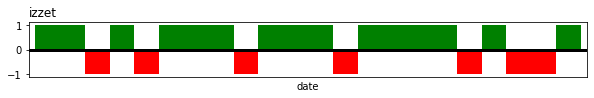

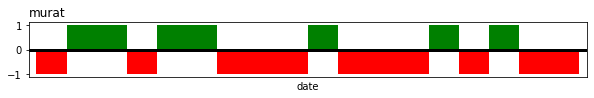

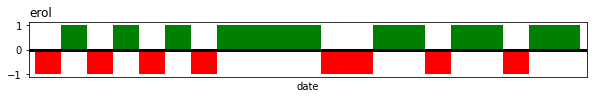

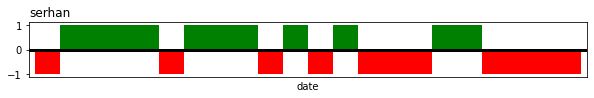

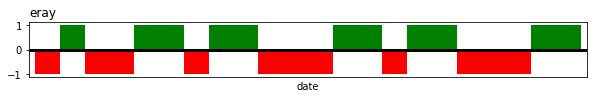

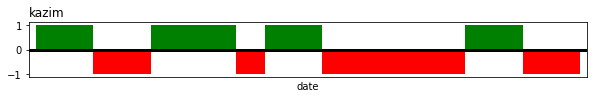

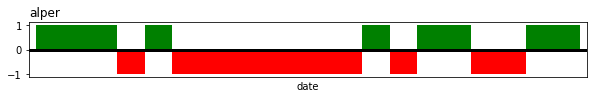

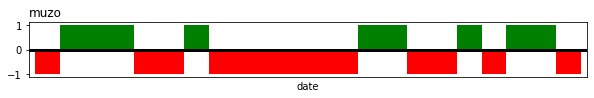

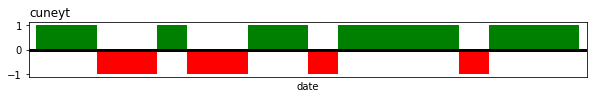

In [9]:
players = scores.drop_duplicates('player')['player']
for player in players:
    plot_win_lose_streaks(player)

## Rankings

Show and rank via win percentage for each player. Alternatives would be
 - total number of wins
 - total IMPs scored
 
but go with win percentages for now

In [10]:
rankings = scores.groupby('player').count().drop(['score'], axis=1)
rankings['pct'] = rankings['wins'] / rankings['result']
rankings = rankings.sort_values(by='pct', ascending=False)

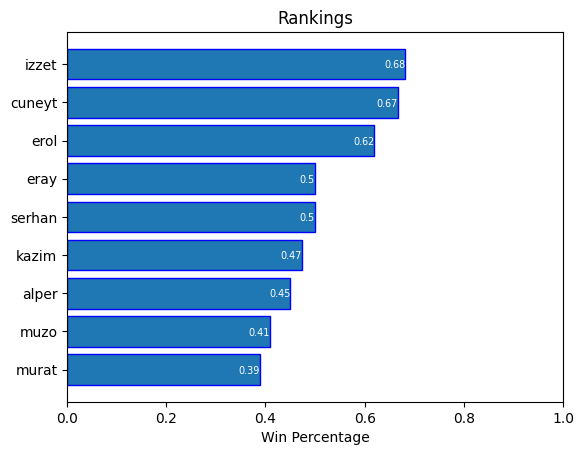

In [11]:
plt.rcdefaults()
fig, ax = plt.subplots()

y_pos = np.arange(len(rankings))
ax.barh(y_pos, rankings['pct'], edgecolor='blue')
ax.set_yticks(y_pos, labels=list(rankings.index))
ax.invert_yaxis()  # highest first
ax.set_xlabel('Win Percentage')
ax.set_title('Rankings')

for i in range(len(rankings.index)):
    plt.text(rankings['pct'][i], y_pos[i], round(rankings['pct'][i],2), 
             ha='right', va='center_baseline', fontsize='x-small', color='white')

ax.set_xlim((0, 1))
plt.show()

yey Izzet is the highest ranking player with Cuneyt a close second.

## Confidence Intervals

In probability theory and statistics, the binomial distribution with parameters n and p is the discrete probability distribution of the number of successes in a sequence of n independent experiments, each asking a yes–no question, and each with its own Boolean-valued outcome: success (with probability p) or failure (with probability q = 1 − p).

Calculate the confidence interval for the win percentages above, i.e. the *correct* win percentage for each player lies somewhere in the interval calculated with a high probability.

In [12]:
from scipy.stats import binomtest

In [13]:
intervals = {}
for i in range(len(rankings.index)):
    result = binomtest(int(rankings.iloc[i]['wins']), int(rankings.iloc[i]['result']), rankings.iloc[i]['pct'], alternative='two-sided')
    intervals[rankings.index[i]] = result.proportion_ci(confidence_level=0.95)

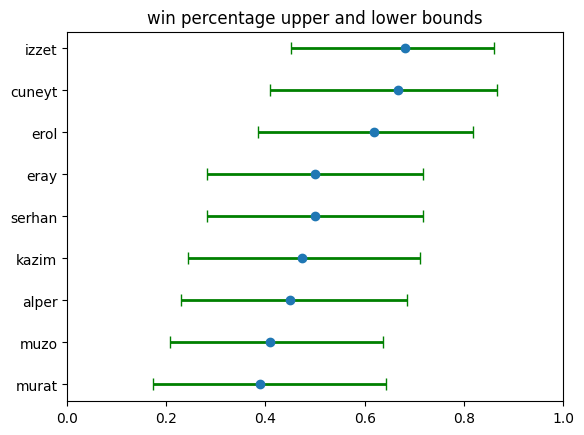

In [14]:
fig, ax = plt.subplots()
x = list()
y = list()
error_range = list()

# reverse for descending order
for i in range(len(intervals.keys())-1,-1, -1):
    # player, center, lower_limit, upper_limit
    # ('izzet', 0.6818181818181818, 0.451275572426236, 0.8613534784462099)
    lines = rankings.index[i], rankings['pct'][rankings.index[i]], intervals[rankings.index[i]][0], intervals[rankings.index[i]][1]
    x.append(lines[1])
    y.append(lines[0])
    error_range.append([lines[1]-lines[2], lines[3]-lines[1]])

ax.errorbar(x, y, xerr=np.array(error_range).T, fmt='o', ecolor='green', elinewidth=2, capsize=4)

# tidy up the figure
ax.set_xlim((0, 1))
ax.set_title('win percentage upper and lower bounds')
plt.show()

That makes sense. Cuneyt played less games than Izzet and hence his upper limit for his *true* percentage is higher.

However, let's not give too much importance to these confidence intervals as the underlying distribution shifts in time - we are improving our bridge playing skills presumably at different rates.  Still, confidence intervals are a nice reminder that the point win percentages are not the be-all and end-all in rankings, especially since the number of games played (n) is still too few in number.